<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/LimpezadedadosTempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as libs necessarias
import pandas as pd
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importando dataset
tempo = pd.read_csv("tempo.csv", sep=";")
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


1-analisar todos os dados categoricos primeiro
2- gerar graficos
3-valores para substituir
4- analisar todos os dados numericos
5- gerar graficos
6-valores para substituir


In [ ]:
#entendendo o dataset
tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


In [ ]:
#contando os Nas
tempo.isna().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
#entendendo cada coluna com group by ou contagem de NA
aparencia_group=tempo.groupby(tempo["Aparencia"]).size()
aparencia_group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

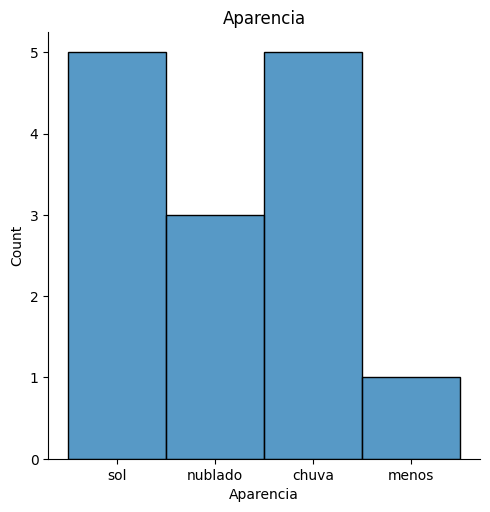

In [ ]:
#gerando grafico de barras para ver distribuicao da mesma
sns.displot(tempo["Aparencia"]).set(title="Aparencia")

In [ ]:
tempo.head(1)
#entendendo a temperatura analisando se existe outliers menores que temperuta de -130 F ou +130F ou NAs
tempo.loc[(tempo["Temperatura"]<-130)| (tempo["Temperatura"]>=130)]


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#entendendo a medidas de distribuicao das temperaturas
tempo["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
#procurando Na na Temperatura ou null
tempo["Temperatura"].isna().sum()

0

<Axes: >

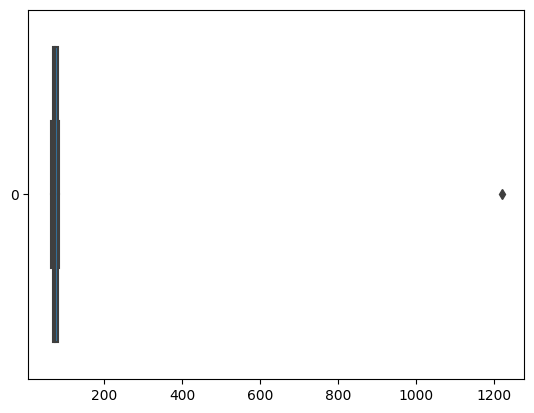

In [ ]:
sns.boxplot(tempo["Temperatura"], orient="h")

In [ ]:
#entendendo as umidade
tempo["Umidade"].isna().sum()

1

In [ ]:
#entendendo os valores de umidade
tempo["Umidade"].describe()


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: >

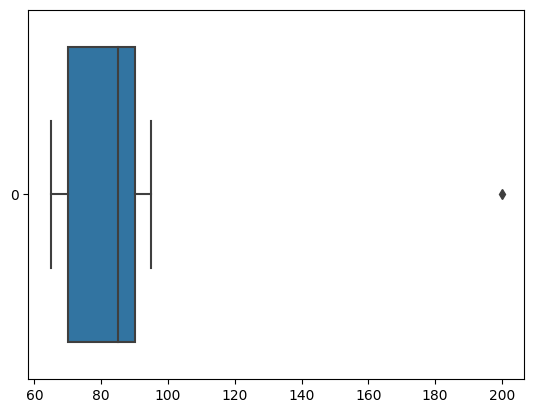

In [ ]:
#entendedo umidade atraves de boxplot
sns.boxplot(tempo["Umidade"], orient="h")

In [ ]:
tempo.head(2)
#entendendo o vento atraves do groupby procurando algum erro de digitacao
vento_group=tempo.groupby(["Vento"]).size()
vento_group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
#contando Na no Vento
tempo["Vento"].isna().sum()

1

<Axes: xlabel='Vento', ylabel='Count'>

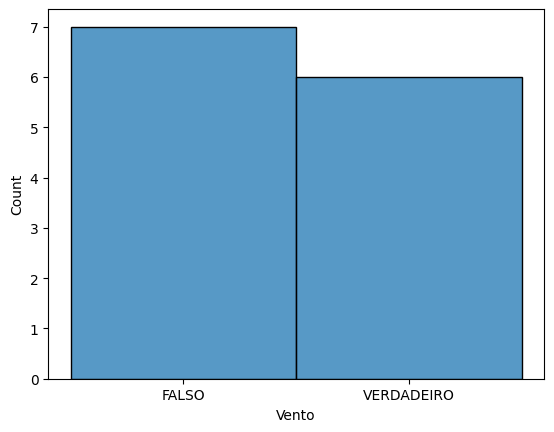

In [ ]:
sns.histplot(tempo["Vento"])

In [ ]:
#jogar ou nao
jogar_group=tempo.groupby(["Jogar"]).size()
jogar_group



Jogar
nao    5
sim    9
dtype: int64

In [ ]:
#analisando se tem Na
tempo["Jogar"].isna().sum()

0

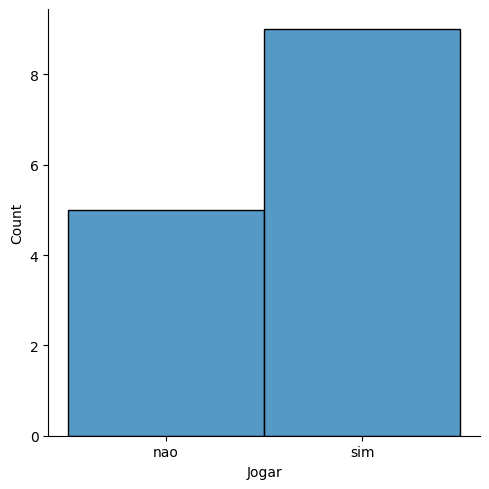

In [ ]:
#gerando grafico de barras
sns.displot(tempo["Jogar"])

In [ ]:
#para subistituir a palavra errada, vamo usar a moda de statistics para encontrar a palavra com
# maior ocorrencia e substitui-lo
moda_aparencia=sts.mode(tempo["Aparencia"])
moda_aparencia

'sol'

In [ ]:
#usandoo o filtro loc[] para substituir a palavra menos
tempo.loc[tempo["Aparencia"].isin(["menos"]),"Aparencia"]=moda_aparencia
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
#sabendo qual a moda de Vento
moda_vento=sts.mode(tempo['Vento'])
moda_vento

'FALSO'

In [ ]:
#usando o fillna para preencher os Na vazios
tempo["Vento"].fillna(moda_vento, inplace=True)
tempo


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,sol,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,FALSO,sim


In [ ]:
#sencontrar  a temperatura mediana
mediana_temp=sts.median(tempo["Temperatura"])
mediana_temp

73.5

In [ ]:
#encontrar as temperaturas fora do padrao para substituir pela mediana
tempo.loc[(tempo["Temperatura"]< -130) | (tempo["Temperatura"]>130)]



,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#substituir as temperaturas fora do padrao
tempo.loc[(tempo["Temperatura"]< -130) | (tempo["Temperatura"]>130), "Temperatura"]=mediana_temp

tempo



,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,200.0,FALSO,sim


In [ ]:
#entendendo umidade, procurando Na
tempo["Umidade"].isna().sum()

mediana_umidade=sts.median(tempo["Umidade"])
mediana_umidade



85.5

In [ ]:
#substituindo NA da umidade usando FILLAN inplace=true
tempo["Umidade"].fillna(mediana_umidade, inplace=True)
tempo["Umidade"].isna().sum()

0

In [ ]:
#encontrando a umidade fora de padrao para a mediana
tempo["Umidade"].describe()
std_umidade=sts.stdev(tempo["Umidade"])
std_umidade

33.204763493832004

In [ ]:
#substituindo umidade fora do para mediana usando a procura LOC[]
tempo.loc[(tempo["Umidade"]> 3*std_umidade )]
tempo.loc[(tempo["Umidade"]> 3 * std_umidade), "Umidade"]=mediana_umidade
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


In [ ]:
#correlacao
corr=tempo.corr()
corr

<ipython-input-35-64bb5e410940>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=tempo.corr()


,Temperatura,Umidade
Temperatura,1.000000,0.419591
Umidade,0.419591,1.000000


In [ ]:
#dataset limpo com as devidas mudanças
tempo

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


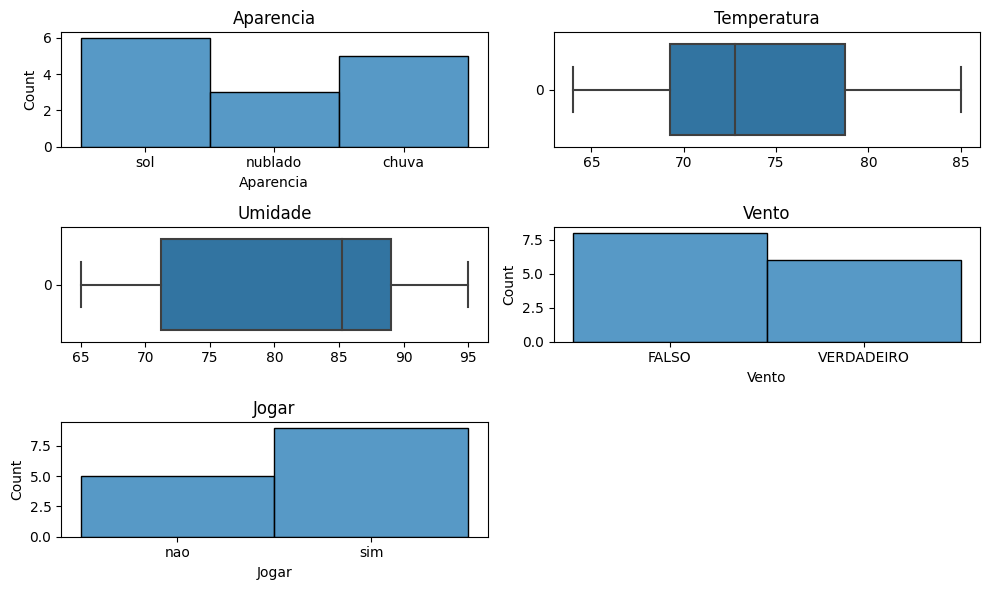

In [ ]:
#gerando graficos usando suplots
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
sns.histplot(tempo["Aparencia"]).set(title="Aparencia")
plt.subplot(3,2,2)
sns.boxplot(tempo["Temperatura"], orient="h").set(title="Temperatura")
plt.subplot(3,2,3)
sns.boxplot(tempo["Umidade"], orient="h").set(title="Umidade")
plt.subplot(3,2,4)
sns.histplot(tempo["Vento"]).set(title="Vento")
plt.subplot(3,2,5)
sns.histplot(tempo["Jogar"]).set(title="Jogar")
plt.tight_layout()

